In [3]:
import numpy as np
import pandas as pd
import json
import sklearn as sk
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')


In [6]:
def confusion_matrix(data, prompt):
    data = data[data["PromptType"]==prompt]
    return np.array([[len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="0"])], [len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="0"])]])

def correctness(data, prompt):
    data = data[data["PromptType"]==prompt]
    return len(data[data["correctness"]=="1"]) / len(data)

In [7]:
data = {}
models = ['FinalMath-DSChat', 'FinalMath-DSReason', 'FinalMath-GeminiFlash', 'FinalMath-o3', 'FinalMath-Qwen1', 'FinalMath-Qwen14', 'FinalMath-Qwen70', 'gemini-pro-math-v3']

for model in models:
    file_path = f"response_evaluation/Math/{model}/resultsEvaluations.jsonl"
    with open(file_path, 'r') as file:
        data[model] = [json.loads(line) for line in file]
    
    prompts = pd.DataFrame(data[model])["PromptType"].unique()
    
    print(model)
    for prompt in prompts:
        print(prompt, ":", confusion_matrix(pd.DataFrame(data[model]), prompt))

    print("Correctness:", correctness(pd.DataFrame(data[model]), prompt))


FinalMath-DSChat
basicprompt : [[ 41 140]
 [  5  64]]
mathPrompt : [[ 44 137]
 [  5  64]]
hint_prompt : [[ 40 130]
 [  5  75]]
explicit_symbol_reasoning_prompt : [[ 37 150]
 [  4  59]]
implicit_symbol_reasoning_prompt : [[ 41 136]
 [  5  66]]
Correctness: 0.5362903225806451
FinalMath-DSReason
basicprompt : [[ 40  96]
 [  6 108]]
Correctness: 0.618
FinalMath-GeminiFlash
basicprompt : [[ 39 133]
 [  4  69]]
mathPrompt : [[ 42 123]
 [  3  76]]
hint_prompt : [[ 34 117]
 [  9  83]]
explicit_symbol_reasoning_prompt : [[ 22  94]
 [ 16 105]]
implicit_symbol_reasoning_prompt : [[ 28  84]
 [ 12 120]]
Correctness: 0.5819672131147541
FinalMath-o3
basicprompt : [[ 38  91]
 [  7 110]]
mathPrompt : [[ 37 102]
 [  9 100]]
hint_prompt : [[ 33  91]
 [ 11 104]]
Correctness: 0.7656903765690377
FinalMath-Qwen1
basicprompt : [[ 42 177]
 [  3  28]]
mathPrompt : [[ 41 182]
 [  3  24]]
hint_prompt : [[ 39 184]
 [  1  26]]
explicit_symbol_reasoning_prompt : [[ 39 182]
 [  2  27]]
implicit_symbol_reasoning_promp

In [57]:
fulldata = pd.DataFrame(data, dtype=str)

In [67]:
prompts = fulldata["PromptType"].unique()
prompts

array(['basicprompt', 'mathPrompt', 'hint_prompt',
       'explicit_symbol_reasoning_prompt',
       'implicit_symbol_reasoning_prompt'], dtype=object)

/tmp/ipykernel_3361665/2649510822.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmd = sk.metrics.ConfusionMatrixDisplay(np.array([[len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="0"])], [len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="0"])]]), display_labels=["Used Brute Force", "Did Not Use Brute Force"])
/tmp/ipykernel_3361665/2649510822.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cmd = sk.metrics.ConfusionMatrixDisplay(np.array([[len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="1"][data["human_bruteforce"]=="0"])], [len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="1"]), len(data[data["model_bruteforce"]=="0"][data["human_bruteforce"]=="0"])]]), disp

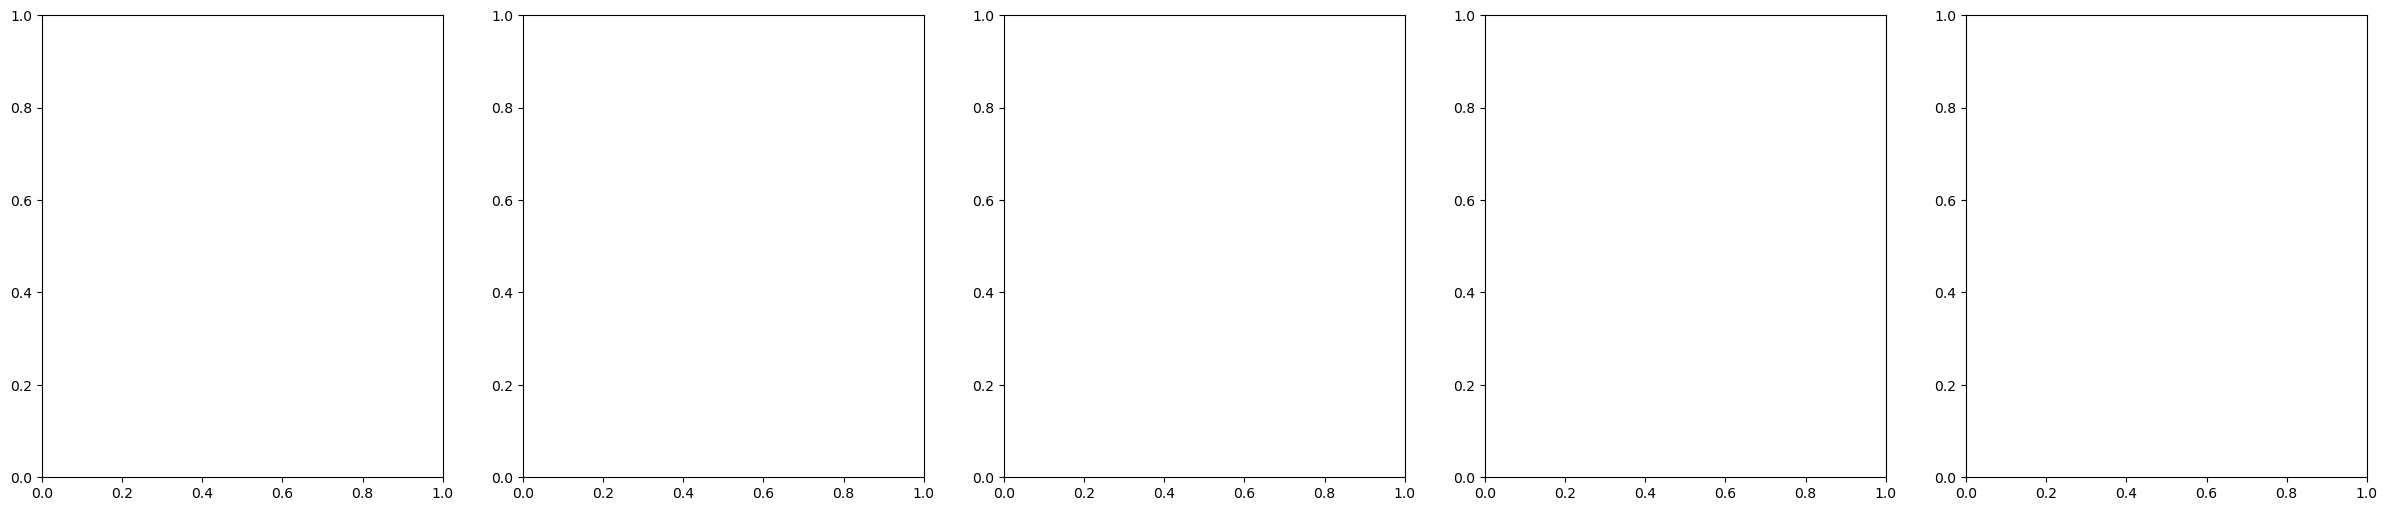

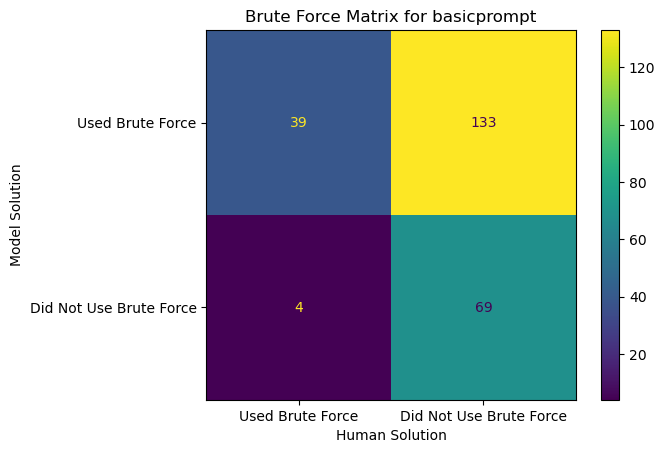

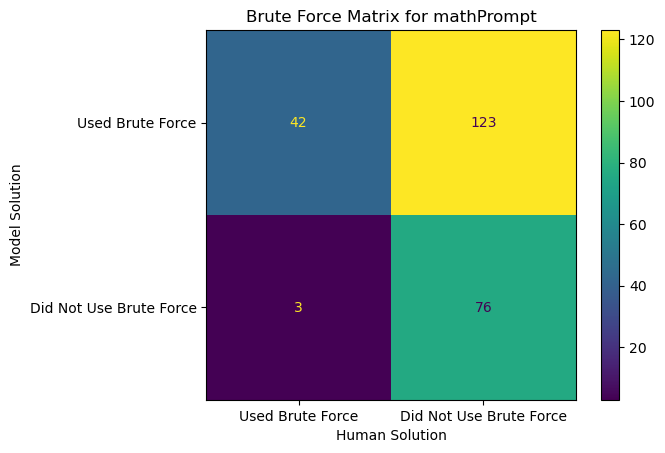

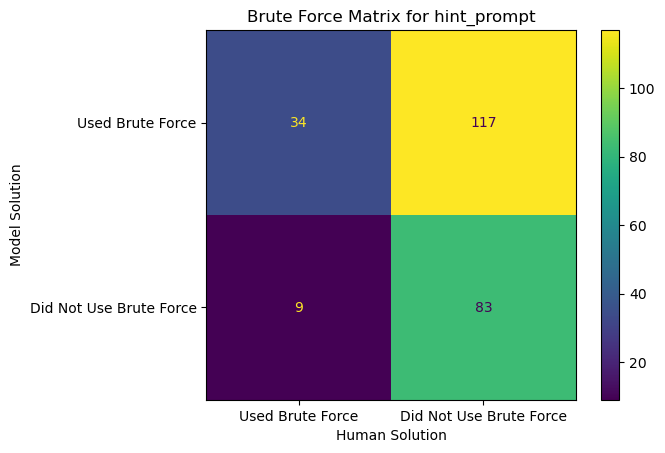

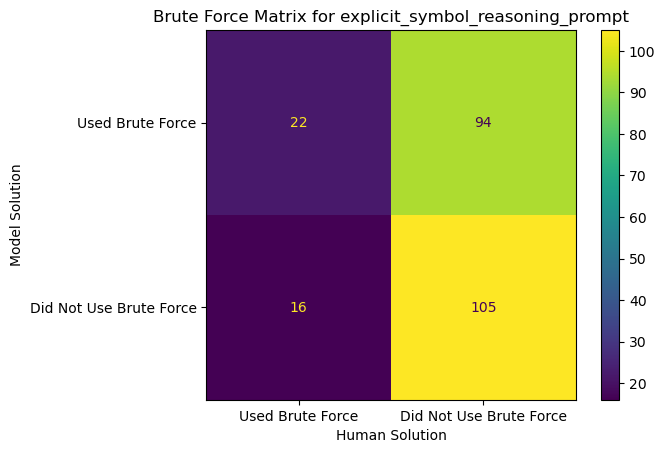

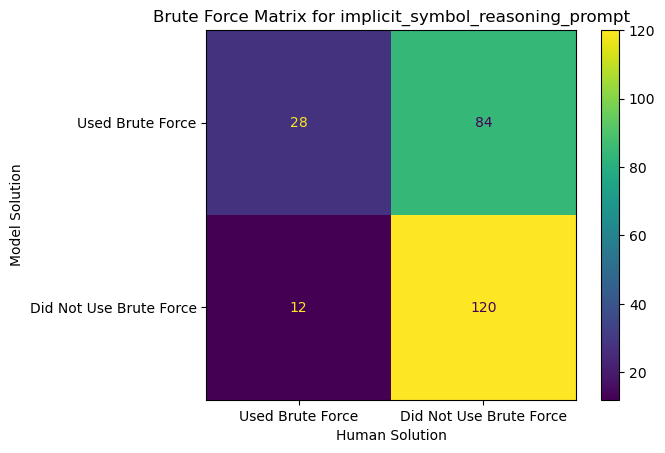

In [ ]:
fig, axes = plt.pyplot.subplots(1, 5, figsize=(30, 6))
for i in range(len(prompts)):
    prompt = prompts[i]
    cmd = sk.metrics.ConfusionMatrixDisplay(confusion_matrix(fulldata, prompt), display_labels=["Used Brute Force", "Did Not Use Brute Force"])
    cmd.plot()
    cmd.ax_.set(xlabel='Human Solution', ylabel='Model Solution')
    cmd.ax_.set_title(f'Brute Force Matrix for {prompt}')

In [85]:
tempdata = fulldata[fulldata["PromptType"] == "basicprompt"]
# print(tempdata.head())
len(tempdata[tempdata["model_bruteforce"]=="1"][tempdata["human_bruteforce"]=="0"])

/tmp/ipykernel_3361665/3711188720.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(tempdata[tempdata["model_bruteforce"]=="1"][tempdata["human_bruteforce"]=="0"])


133